# CME 193 - Scientific Python
### Lecture 6 (4/26)
Spring 2016, Stanford University

## Last time
* Object Oriented Programming!

## Today
* Dealing with data
* Building some predictive models
* Some buzzwords 4 u

# Intro to Pandas 

### (and a bit of Seaborn)

## What is Pandas?

* Open source, well maintained library for the most fundamental portion of science / research / data science
* Data structures, data analysis tools
    * Makes the barriers to entry from R / SAS / Stata as small as possible...
* Some nice plotting wrappers

If you like this kind of stuff, definitely check out the Pandas cookbook!
https://github.com/jvns/pandas-cookbook

## What is Seaborn?

Seaborn is a context and style manager for matplotlib, the standard plotting package for Python.

TL;DR -- makes stuff pretty

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style("dark")
sns.set_context("talk")

Let's start looking at some data!

## Iris Data

We'll use the standard Iris data set. Let's load data **directly** from an online source!

In [5]:
iris = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None,
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
)

What's going on here?

In [6]:
type(iris)

pandas.core.frame.DataFrame

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# DATA SCIENCE!

Let's do some exploratory data science with Pandas + Iris!

If you use data in what you do, you probably aren't doing enough of this!

In [8]:
iris.head(n=2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


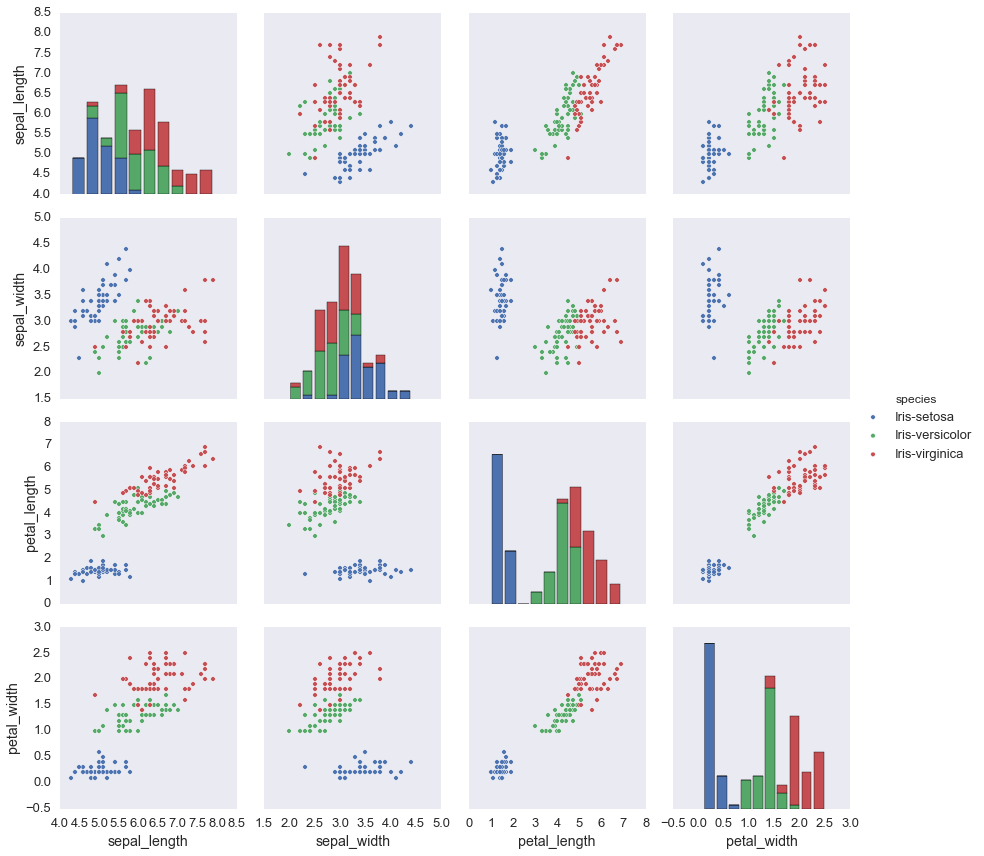

In [9]:
sns.pairplot(iris, hue='species')

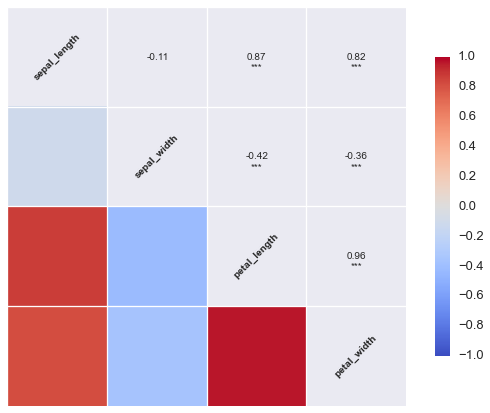

In [10]:
sns.corrplot(iris.drop('species', 1))

Can index using dot notation!

In [11]:
iris.sepal_length.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

Calculating summary statistics is easy

In [12]:
print 'The mean sepal length is {}'.format(iris.sepal_length.mean())

The mean sepal length is 5.84333333333


In [13]:
iris.sepal_length.ix[0]

5.0999999999999996

It's easy to select columns

In [14]:
iris[['sepal_length', 'sepal_width']].head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [15]:
x = iris[['sepal_length', 'sepal_width']][:3]

In [16]:
x

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [17]:
X = x.values

In [18]:
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2]])

# Data Exploration from **scratch**

Let's do some data science in numpy!

Let's get principal components analysis working (PCA)

### What is PCA?

* Transform a bunch of data into a set of linearly uncorrelated (orthogonal) features
* Think of it as a decomposition -- we're able to figure out how much variance per feature

## Some Math...

Let's say we have data $X$, and each feature (variable) has zero mean, unit variance.

We talked about the SVD before. 

We said that for *any* $X\in\mathbb{C}$, we can find:

$$
X = U\Sigma V^T
$$

Where $U$ and $V$ are unitary, and $\Sigma$ is diagonal.

Suppose we wanted to find a linear mapping, call it $W$, that transforms my data $X$ into it Principal Component, i.e., $T = XW$ are my principal components.

I claim that setting $W = V$ (from SVD) satisfies this. Furthermore, the uncorrelated version of my data $X$ is simply:

$$
XW = U\Sigma V^T W = U\Sigma W^T W = U\Sigma
$$

So, if I wanted to transform my data, all I need to do is:

* Center / normalize $X$
* Find $X = U\Sigma V^T$
* My principal components are $T = U\Sigma$

Let's do this with Iris data!

First, let's convert Iris to a numpy array

In [19]:
X = iris.drop('species', 1).values

In [20]:
X.shape

(150, 4)

Let's center our matrix! We'll use **broadcasting**...

In [21]:
print 'Mean Values: {}'.format(X.mean(axis=0))
print 'Mean Shape: {}'.format(X.mean(axis=0).shape)
print 'Stdev Values: {}'.format(X.std(axis=0))
print 'Stdev Shape: {}'.format(X.std(axis=0).shape)

Mean Values: [ 5.84333333  3.054       3.75866667  1.19866667]
Mean Shape: (4,)
Stdev Values: [ 0.82530129  0.43214658  1.75852918  0.76061262]
Stdev Shape: (4,)


In [22]:
X_centered = (X - X.mean(axis=0)) / X.std(axis=0)

shapes: `((150, 4) - (4, )) / (4, )`

In [23]:
print 'Mean Values: {}'.format(X_centered.mean(axis=0))
print 'Stdev Values: {}'.format(X_centered.std(axis=0))

Mean Values: [ -4.73695157e-16  -6.63173220e-16   3.31586610e-16  -2.84217094e-16]
Stdev Values: [ 1.  1.  1.  1.]


### Let's take our SVD and get to work!

In [24]:
U, S, V = np.linalg.svd(X_centered)

Let's form $\Sigma$...

`S` isnt in the right form yet

In [25]:
S

array([ 20.89551896,  11.75513248,   4.7013819 ,   1.75816839])

In [26]:
# sigma needs to be the same shape as X
sigma = np.zeros(X.shape)

In [27]:
# we need the upper 4x4 square to be the diagonal matrix we expect
sigma[:X.shape[1]] = np.diag(S)

In [28]:
sigma

array([[ 20.89551896,   0.        ,   0.        ,   0.        ],
       [  0.        ,  11.75513248,   0.        ,   0.        ],
       [  0.        ,   0.        ,   4.7013819 ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.75816839],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0

In [29]:
# let's verify our shortcut, and grab our PCs
T = np.dot(U, sigma)

In [30]:
# and treating V as a mapping...let's also grab PCs
Tprime = np.dot(X_centered, V.T)

In [31]:
np.allclose(T, Tprime)

True

In [32]:
T.shape

(150, 4)

In [33]:
cols = ['pc_%s' % i for i in range(T.shape[-1])]
print cols

['pc_0', 'pc_1', 'pc_2', 'pc_3']


In [34]:
pc = pd.DataFrame(T, columns=cols)

In [35]:
pc['species'] = iris.species

In [36]:
pc.head()

,pc_0,pc_1,pc_2,pc_3,species
0,-2.264542,-0.505704,0.121943,0.023073,Iris-setosa
1,-2.086426,0.655405,0.227251,0.103208,Iris-setosa
2,-2.367950,0.318477,-0.051480,0.027825,Iris-setosa
3,-2.304197,0.575368,-0.098860,-0.066311,Iris-setosa
4,-2.388777,-0.674767,-0.021428,-0.037397,Iris-setosa


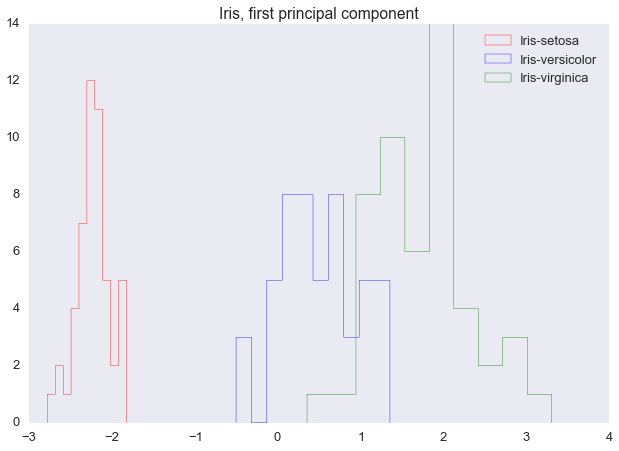

In [37]:
COLORS = ['red', 'blue', 'green']
for i, (key, group) in enumerate(pc.groupby('species')):
    plt.hist(group['pc_0'].values, histtype='step', label=key, color=COLORS[i])
plt.title('Iris, first principal component')
plt.legend()

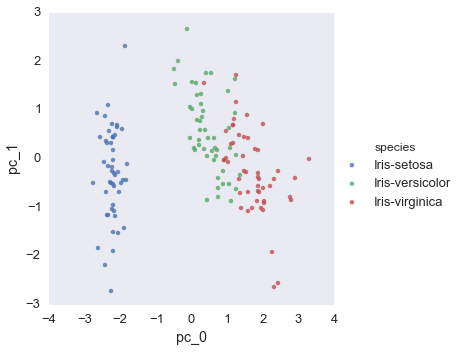

In [38]:
sns.lmplot('pc_0', 'pc_1', data=pc, hue='species', fit_reg=False)

This seems to be picking up most variation in two components

How can we verify this fact?

Well, let's look at $U\Sigma V^T$, and call $\sigma_i = \Sigma_{ii}$. 

I claim that the percent variance explained by the $i$th Principal Component is

$$
\frac{\sigma_i}{\sum_{j=1}^{p}\sigma_j}
$$

Let's look at this with our data!

In [39]:
print S

[ 20.89551896  11.75513248   4.7013819    1.75816839]


In [40]:
v = (100.) * (S / S.sum())

In [41]:
for i, pc in enumerate(v):
    print 'Principal Component #%i accounts for %.2f%% of the variance' % (i, pc)

Principal Component #0 accounts for 53.43% of the variance
Principal Component #1 accounts for 30.06% of the variance
Principal Component #2 accounts for 12.02% of the variance
Principal Component #3 accounts for 4.50% of the variance


Let's go one final step further! Let's look at cumulative variance.

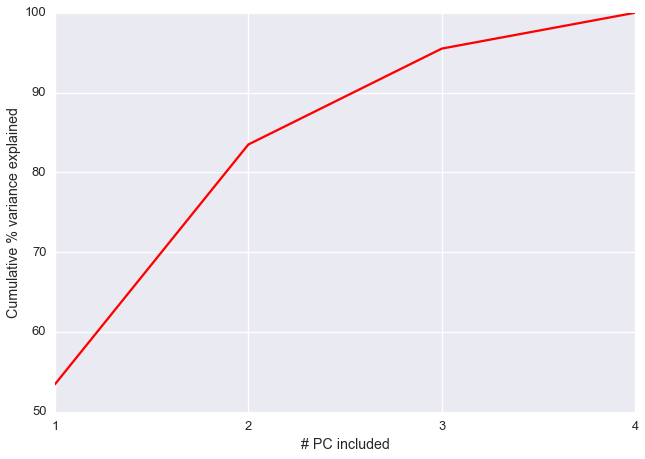

In [42]:
v_tot = v.cumsum()
plt.plot(range(1, 5), v_tot, color='red')
plt.xticks(range(1, 5))
plt.grid(True)
plt.xlabel('# PC included')
plt.ylabel('Cumulative % variance explained')

# Thanks

Office hours will be from 5-6:30 in Y2E2 105